In [1]:
import pandas as pd
import numpy as np
from numpy import where
import collections
from collections import Counter
import sklearn
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score

In [2]:
h15 = pd.read_excel('/Users/mac/Desktop/TFG/data/tables/ARG/household/2015/EPH_usu_2doTrim_2015_xls/usu_hogar_T215.xls')  
h15

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,AGLOMERADO,PONDERA,IV1,...,GDECCFR,PDECCFR,ADECCFR,PONDIH,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4
0,TQRMNOQUXHKOKMCDEGKDB00475140,2016,2,1,1,43,N,14,77,1,...,,12,12,0,2,0,98,0,0,0
1,TQRMNOQQYHMMKTCDEGKDB00475009,2016,2,1,1,43,N,14,66,1,...,,07,07,79,2,0,98,0,0,0
2,TQRMNORVUHJMKSCDEGKDB00475326,2016,2,1,1,43,N,14,59,1,...,,07,08,66,1,0,2,0,0,0
3,TQRMNOPQUHMMKTCDEGKDB00475005,2016,2,1,1,43,N,14,66,1,...,,09,10,81,2,0,98,0,0,0
4,TQRMNORVRHJMKSCDEGKDB00475324,2016,2,1,1,43,N,14,59,1,...,,03,04,65,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18791,TQRMNORXVHMNKTCDEOHCH00487178,2016,2,1,1,44,N,91,77,1,...,,06,05,89,1,0,97,0,0,0
18792,TQRMNORXWHMNKTCDEOHCH00487179,2016,2,1,1,44,N,91,77,1,...,,09,08,90,1,0,98,0,0,0
18793,TQRMNOQRPHLMKMCDEIOAH00486340,2016,2,1,1,43,N,38,89,1,...,,12,12,0,1,0,2,0,0,0
18794,TQRMNOQQUHKOLLCDEIOAH00486313,2016,2,1,1,43,N,38,117,1,...,,08,09,135,2,0,98,0,0,0


In [3]:
for col in h15.columns:
    print(col)

CODUSU
ANO4
TRIMESTRE
NRO_HOGAR
REALIZADA
REGION
MAS_500
AGLOMERADO
PONDERA
IV1
IV1_ESP
IV2
IV3
IV3_ESP
IV4
IV5
IV6
IV7
IV7_ESP
IV8
IV9
IV10
IV11
IV12_1
IV12_2
IV12_3
II1
II2
II3
II3_1
II4_1
II4_2
II4_3
II5
II5_1
II6
II6_1
II7
II7_ESP
II8
II8_ESP
II9
V1
V2
V21
V22
V3
V4
V5
V6
V7
V8
V9
V10
V11
V12
V13
V14
V15
V16
V17
V18
V19_A
V19_B
IX_TOT
IX_MEN10
IX_MAYEQ10
ITF
DECIFR
IDECIFR
RDECIFR
GDECIFR
PDECIFR
ADECIFR
IPCF
DECCFR
IDECCFR
RDECCFR
GDECCFR
PDECCFR
ADECCFR
PONDIH
VII1_1
VII1_2
VII2_1
VII2_2
VII2_3
VII2_4


In [4]:
var15 = h15[['IV1', 'IV2','IV6','IV8', 'IV9','IV12_1', 'II2','II4_1', 'II4_3','V1', 'ITF', 'IPCF','AGLOMERADO']]
var15

,IV1,IV2,IV6,IV8,IV9,IV12_1,II2,II4_1,II4_3,V1,ITF,IPCF,AGLOMERADO
0,1,3,1,1,1,2,2,1,1,1,0,0.00,14
1,1,3,1,1,1,2,2,1,1,1,19000,6333.33,14
2,1,2,1,1,1,2,1,1,2,2,13800,6900.00,14
3,1,4,1,1,1,2,1,1,1,1,25000,12500.00,14
4,1,3,1,1,1,2,1,1,1,1,6000,3000.00,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18791,1,1,1,1,1,2,1,1,2,2,5500,5500.00,91
18792,1,4,1,1,1,2,1,1,2,1,10900,10900.00,91
18793,1,2,1,1,1,2,2,1,1,1,0,0.00,38
18794,1,2,1,1,1,2,1,1,2,2,17900,8950.00,38


In [5]:
var15.value_counts()

IV1  IV2  IV6  IV8  IV9  IV12_1  II2  II4_1  II4_3  V1  ITF    IPCF      AGLOMERADO
1    3    1    1    1    2       2    1      2      1   0      0.00      33            83
     2    1    1    1    2       2    1      2      1   0      0.00      33            39
2    3    1    1    1    2       2    1      2      1   0      0.00      32            37
1    4    1    1    1    2       3    1      2      1   0      0.00      33            31
                                             1      1   0      0.00      33            30
                                                                                       ..
     3    1    1    1    2       2    1      1      1   18000  9000.00   15             1
                                                                         26             1
                                                                         33             1
                                                               18000.00  3              1
6    5    1    1

In [6]:
null_counts = var15.isnull().sum()
print(null_counts)

IV1           0
IV2           0
IV6           0
IV8           0
IV9           0
IV12_1        0
II2           0
II4_1         0
II4_3         0
V1            0
ITF           0
IPCF          0
AGLOMERADO    0
dtype: int64


In [7]:
print(var15.describe())

                IV1           IV2           IV6           IV8           IV9  \
count  18796.000000  18796.000000  18796.000000  18796.000000  18796.000000   
mean       1.219089      3.064961      1.024526      1.002607      1.032081   
std        0.461891      2.207338      0.160753      0.050993      0.190720   
min        1.000000      1.000000      1.000000      1.000000      0.000000   
25%        1.000000      2.000000      1.000000      1.000000      1.000000   
50%        1.000000      3.000000      1.000000      1.000000      1.000000   
75%        1.000000      4.000000      1.000000      1.000000      1.000000   
max        6.000000     99.000000      3.000000      2.000000      3.000000   

             IV12_1           II2         II4_1         II4_3            V1  \
count  18796.000000  18796.000000  18796.000000  18796.000000  18796.000000   
mean       1.929293      1.901628      1.046446      1.691530      1.199936   
std        0.256341      0.856290      0.216683    

                 IV1       IV2       IV6       IV8       IV9    IV12_1  \
IV1         1.000000 -0.117548  0.024363  0.023187  0.012617  0.036475   
IV2        -0.117548  1.000000 -0.074214 -0.039320 -0.055631 -0.000533   
IV6         0.024363 -0.074214  1.000000  0.173938  0.482808 -0.065080   
IV8         0.023187 -0.039320  0.173938  1.000000 -0.276669 -0.002179   
IV9         0.012617 -0.055631  0.482808 -0.276669  1.000000 -0.067870   
IV12_1      0.036475 -0.000533 -0.065080 -0.002179 -0.067870  1.000000   
II2        -0.188992  0.290701 -0.060936 -0.042867 -0.032801 -0.045021   
II4_1       0.053020 -0.050582  0.170448  0.066086  0.123588 -0.057735   
II4_3       0.200586 -0.135179  0.092728  0.031689  0.085243 -0.024097   
V1          0.052318 -0.019772 -0.017855 -0.007101 -0.024818  0.049349   
ITF        -0.012179  0.084214 -0.050240 -0.021974 -0.046733  0.015180   
IPCF        0.089185  0.014351 -0.060988 -0.021444 -0.061958  0.055342   
AGLOMERADO  0.028468 -0.024907 -0.0042

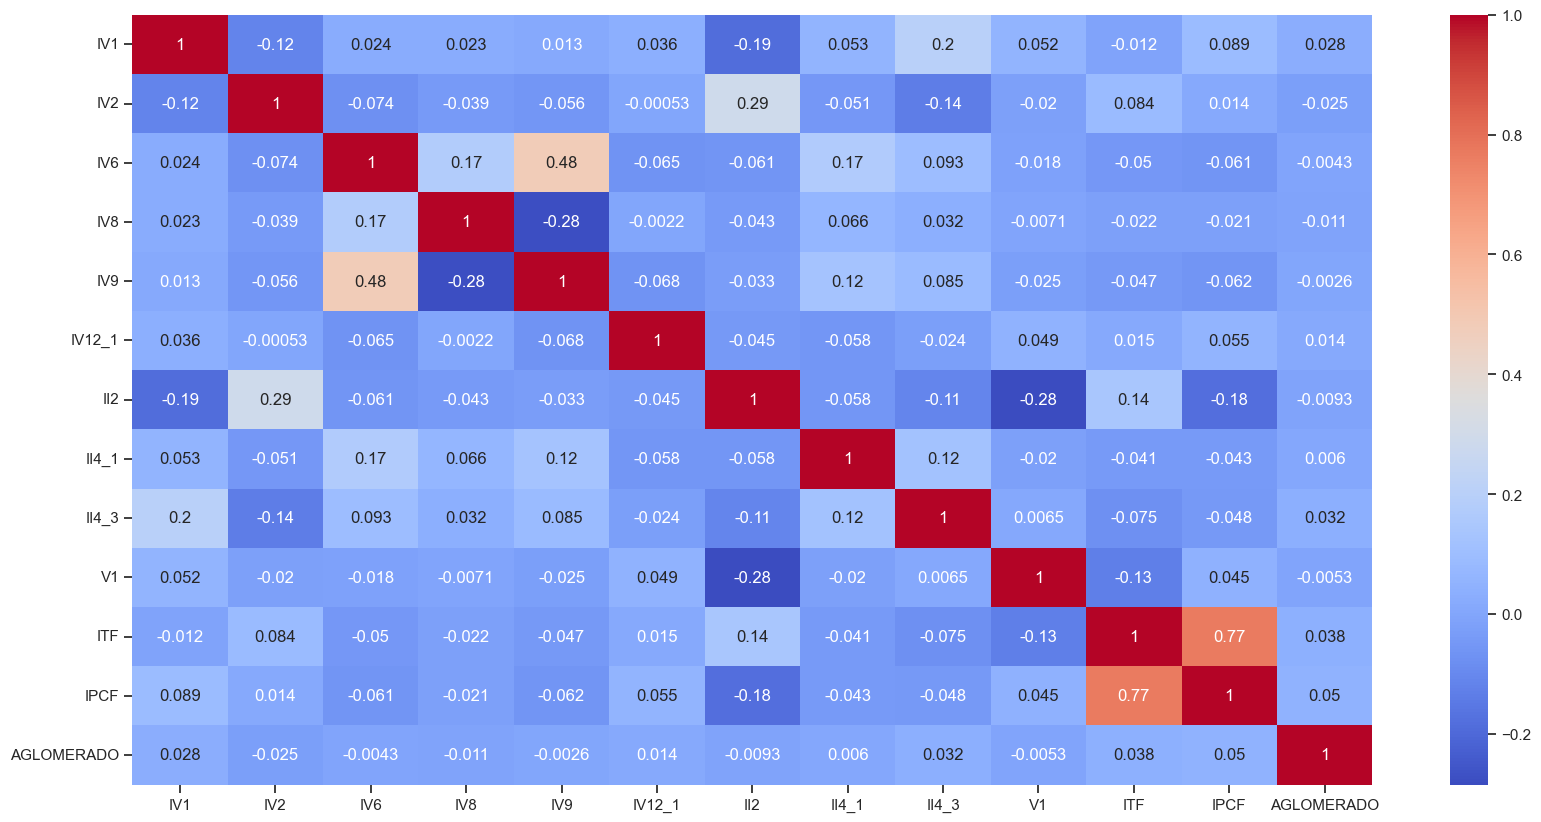

In [8]:
print(var15.corr())
sns.set(style="ticks")
plt.figure(figsize=(20,10))
sns.heatmap(var15.corr(), annot=True, cmap='coolwarm')
plt.show()

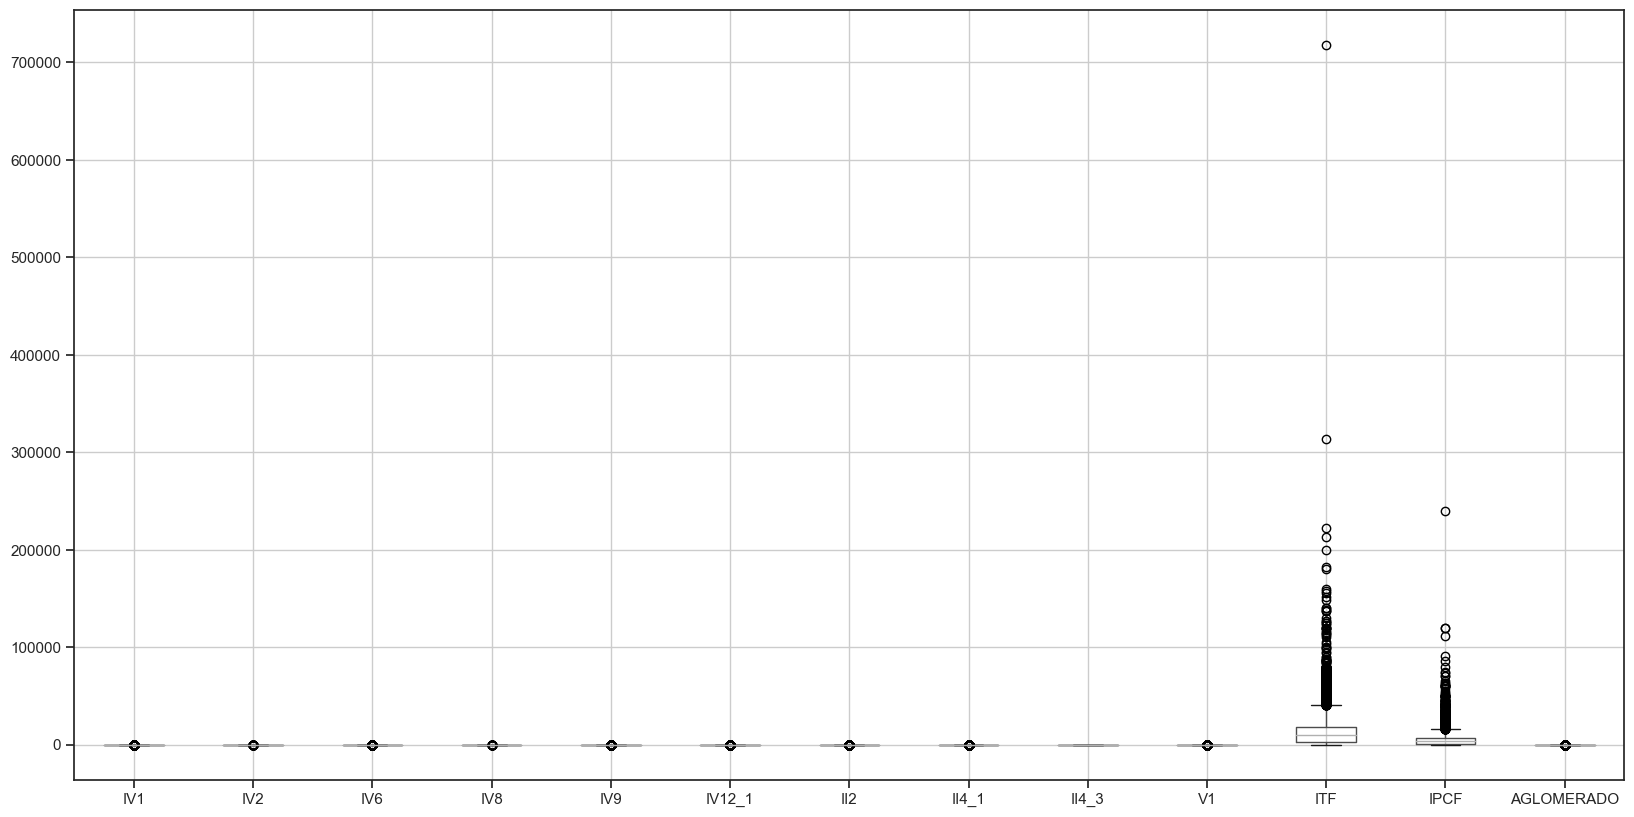

In [9]:
var15.boxplot(figsize=(20,10))
plt.show()

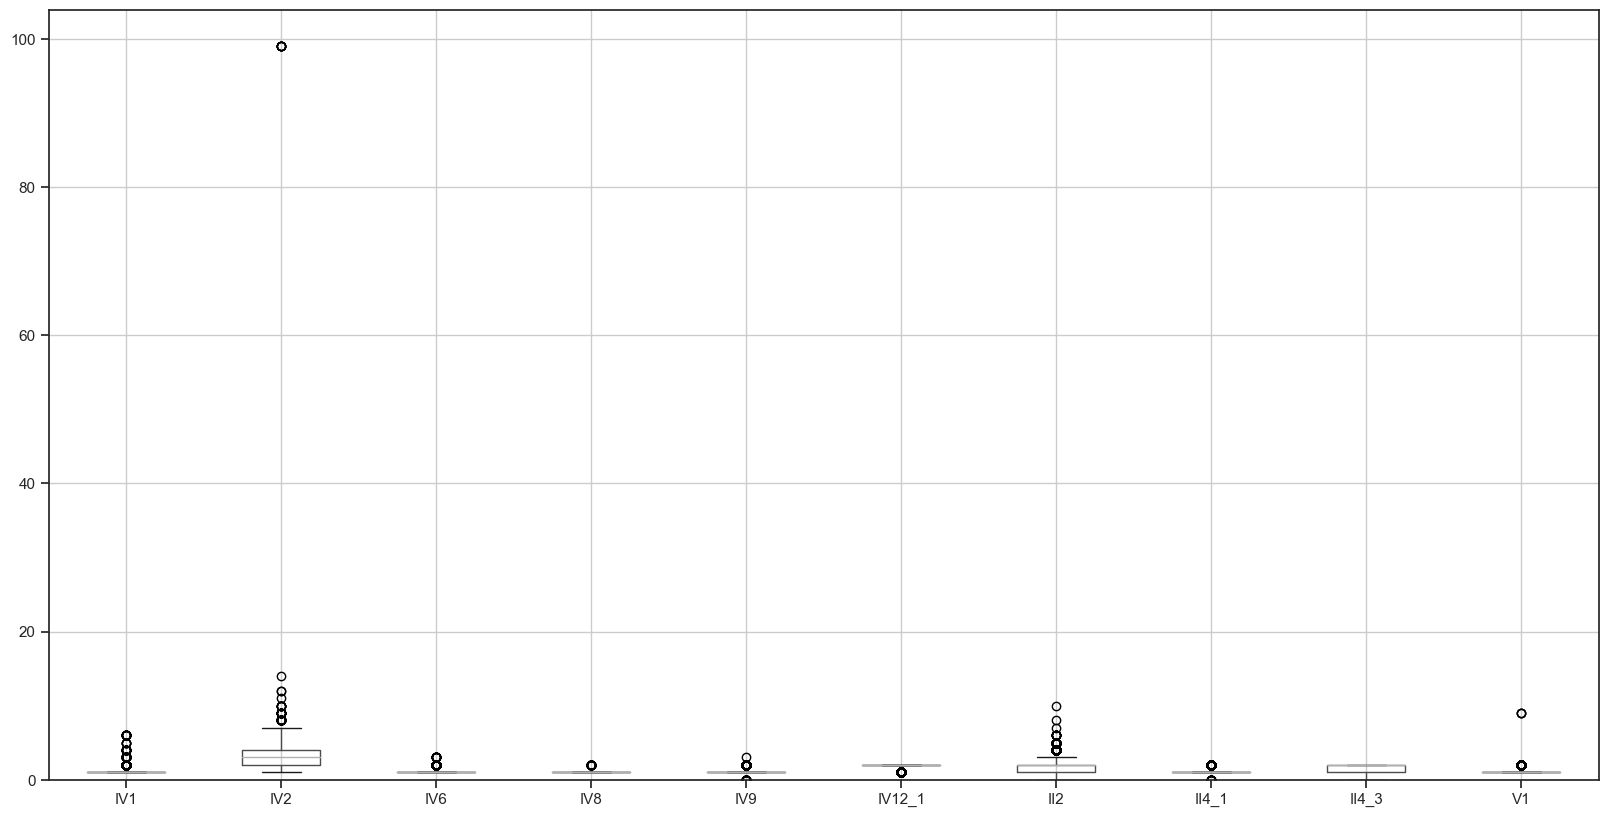

In [10]:
box=var15.drop(['ITF','IPCF','AGLOMERADO'],axis=1)
box.boxplot(figsize=(20,10))
plt.ylim(0, None)
plt.show()

In [11]:
var15['IV2'].value_counts()

3     6899
2     4345
4     4084
1     1727
5     1201
6      374
7       97
8       39
9       13
99       7
10       6
12       2
14       1
11       1
Name: IV2, dtype: int64

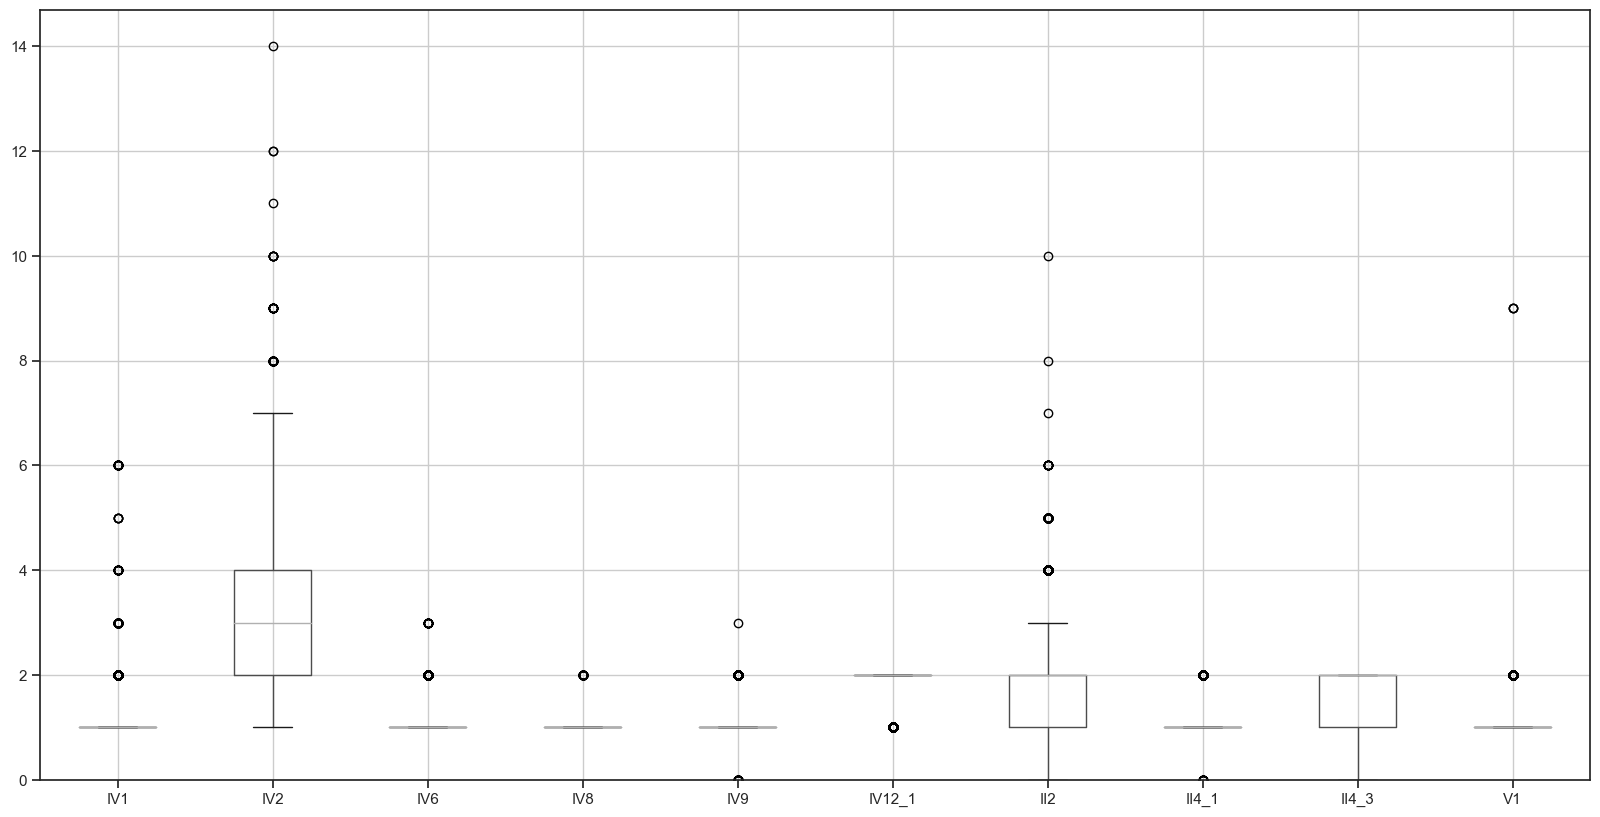

In [12]:
mean_IV2 = np.mean(var15.loc[var15['IV2'] != 99, 'IV2'])
var15.loc[var15['IV2'] == 99, 'IV2'] = mean_IV2
var15['IV2'].value_counts()
box=var15.drop(['ITF','IPCF','AGLOMERADO'],axis=1)
box.boxplot(figsize=(20,10))
plt.ylim(0, None)
plt.show()

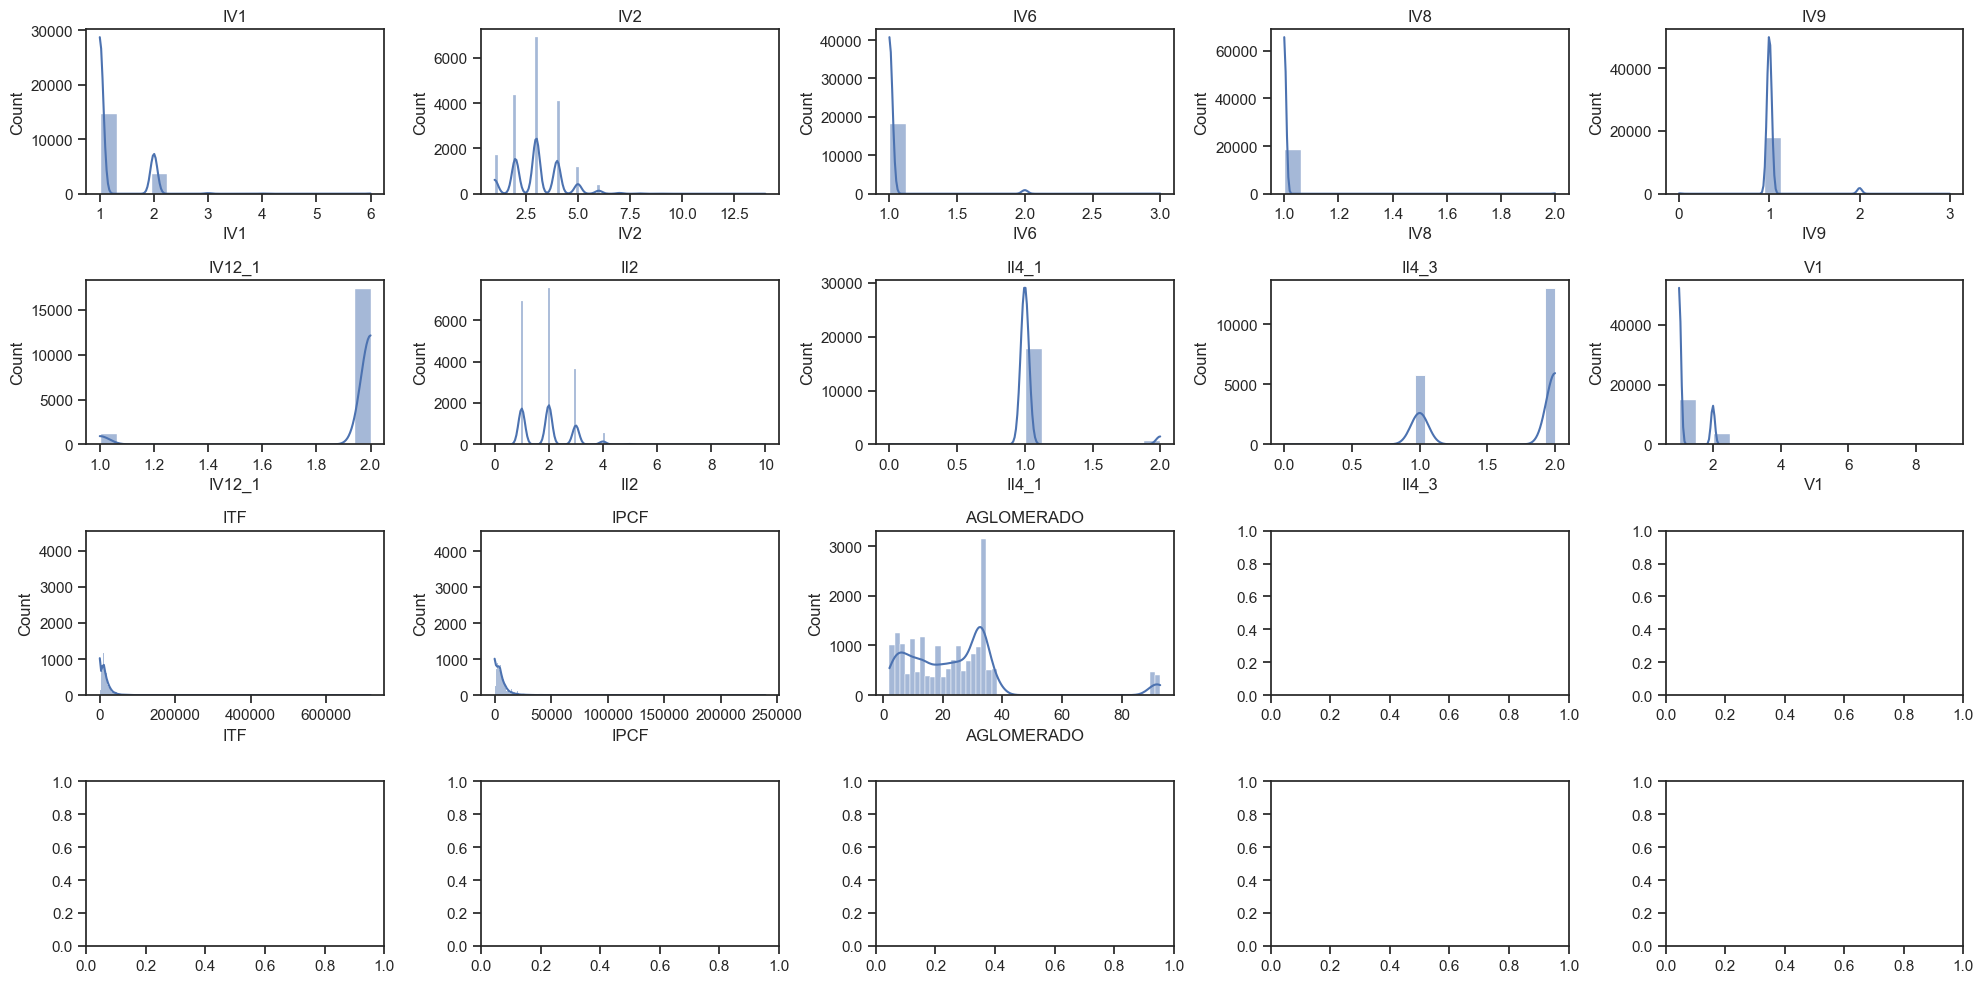

In [13]:
num_rows = 4
num_cols = 5
variable_names = list(var15.columns)
num_figures = len(variable_names)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))
for i, var_name in enumerate(variable_names):
    row_index = i // num_cols
    col_index = i % num_cols
    ax = axes[row_index, col_index]
    sns.histplot(data=var15[var_name], ax=ax, kde=True)
    ax.set_title(var_name)
plt.tight_layout()
plt.show()

/var/folders/vj/crlt_wk5433clrm0qp9q9f3w0000gn/T/ipykernel_96105/564189726.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=var15['ITF'], shade=True)


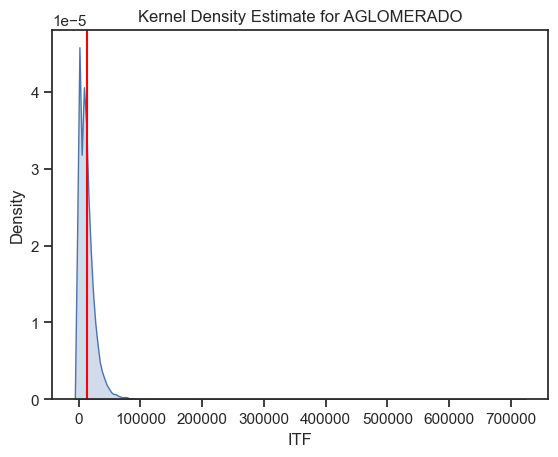

In [14]:
sns.kdeplot(data=var15['ITF'], shade=True)
mean_value = var15['ITF'].mean()
plt.axvline(x=mean_value, color='red')
plt.title(f"Kernel Density Estimate for Family Income")
plt.show()

In [15]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(var15)

/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

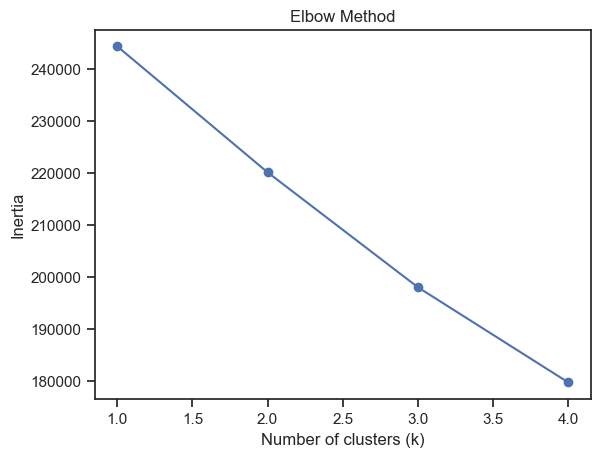

In [16]:
inertia = []
k_values = list(range(1, 5))
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [17]:
k = 3 
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_clusters = kmeans.fit_predict(data_scaled)

/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


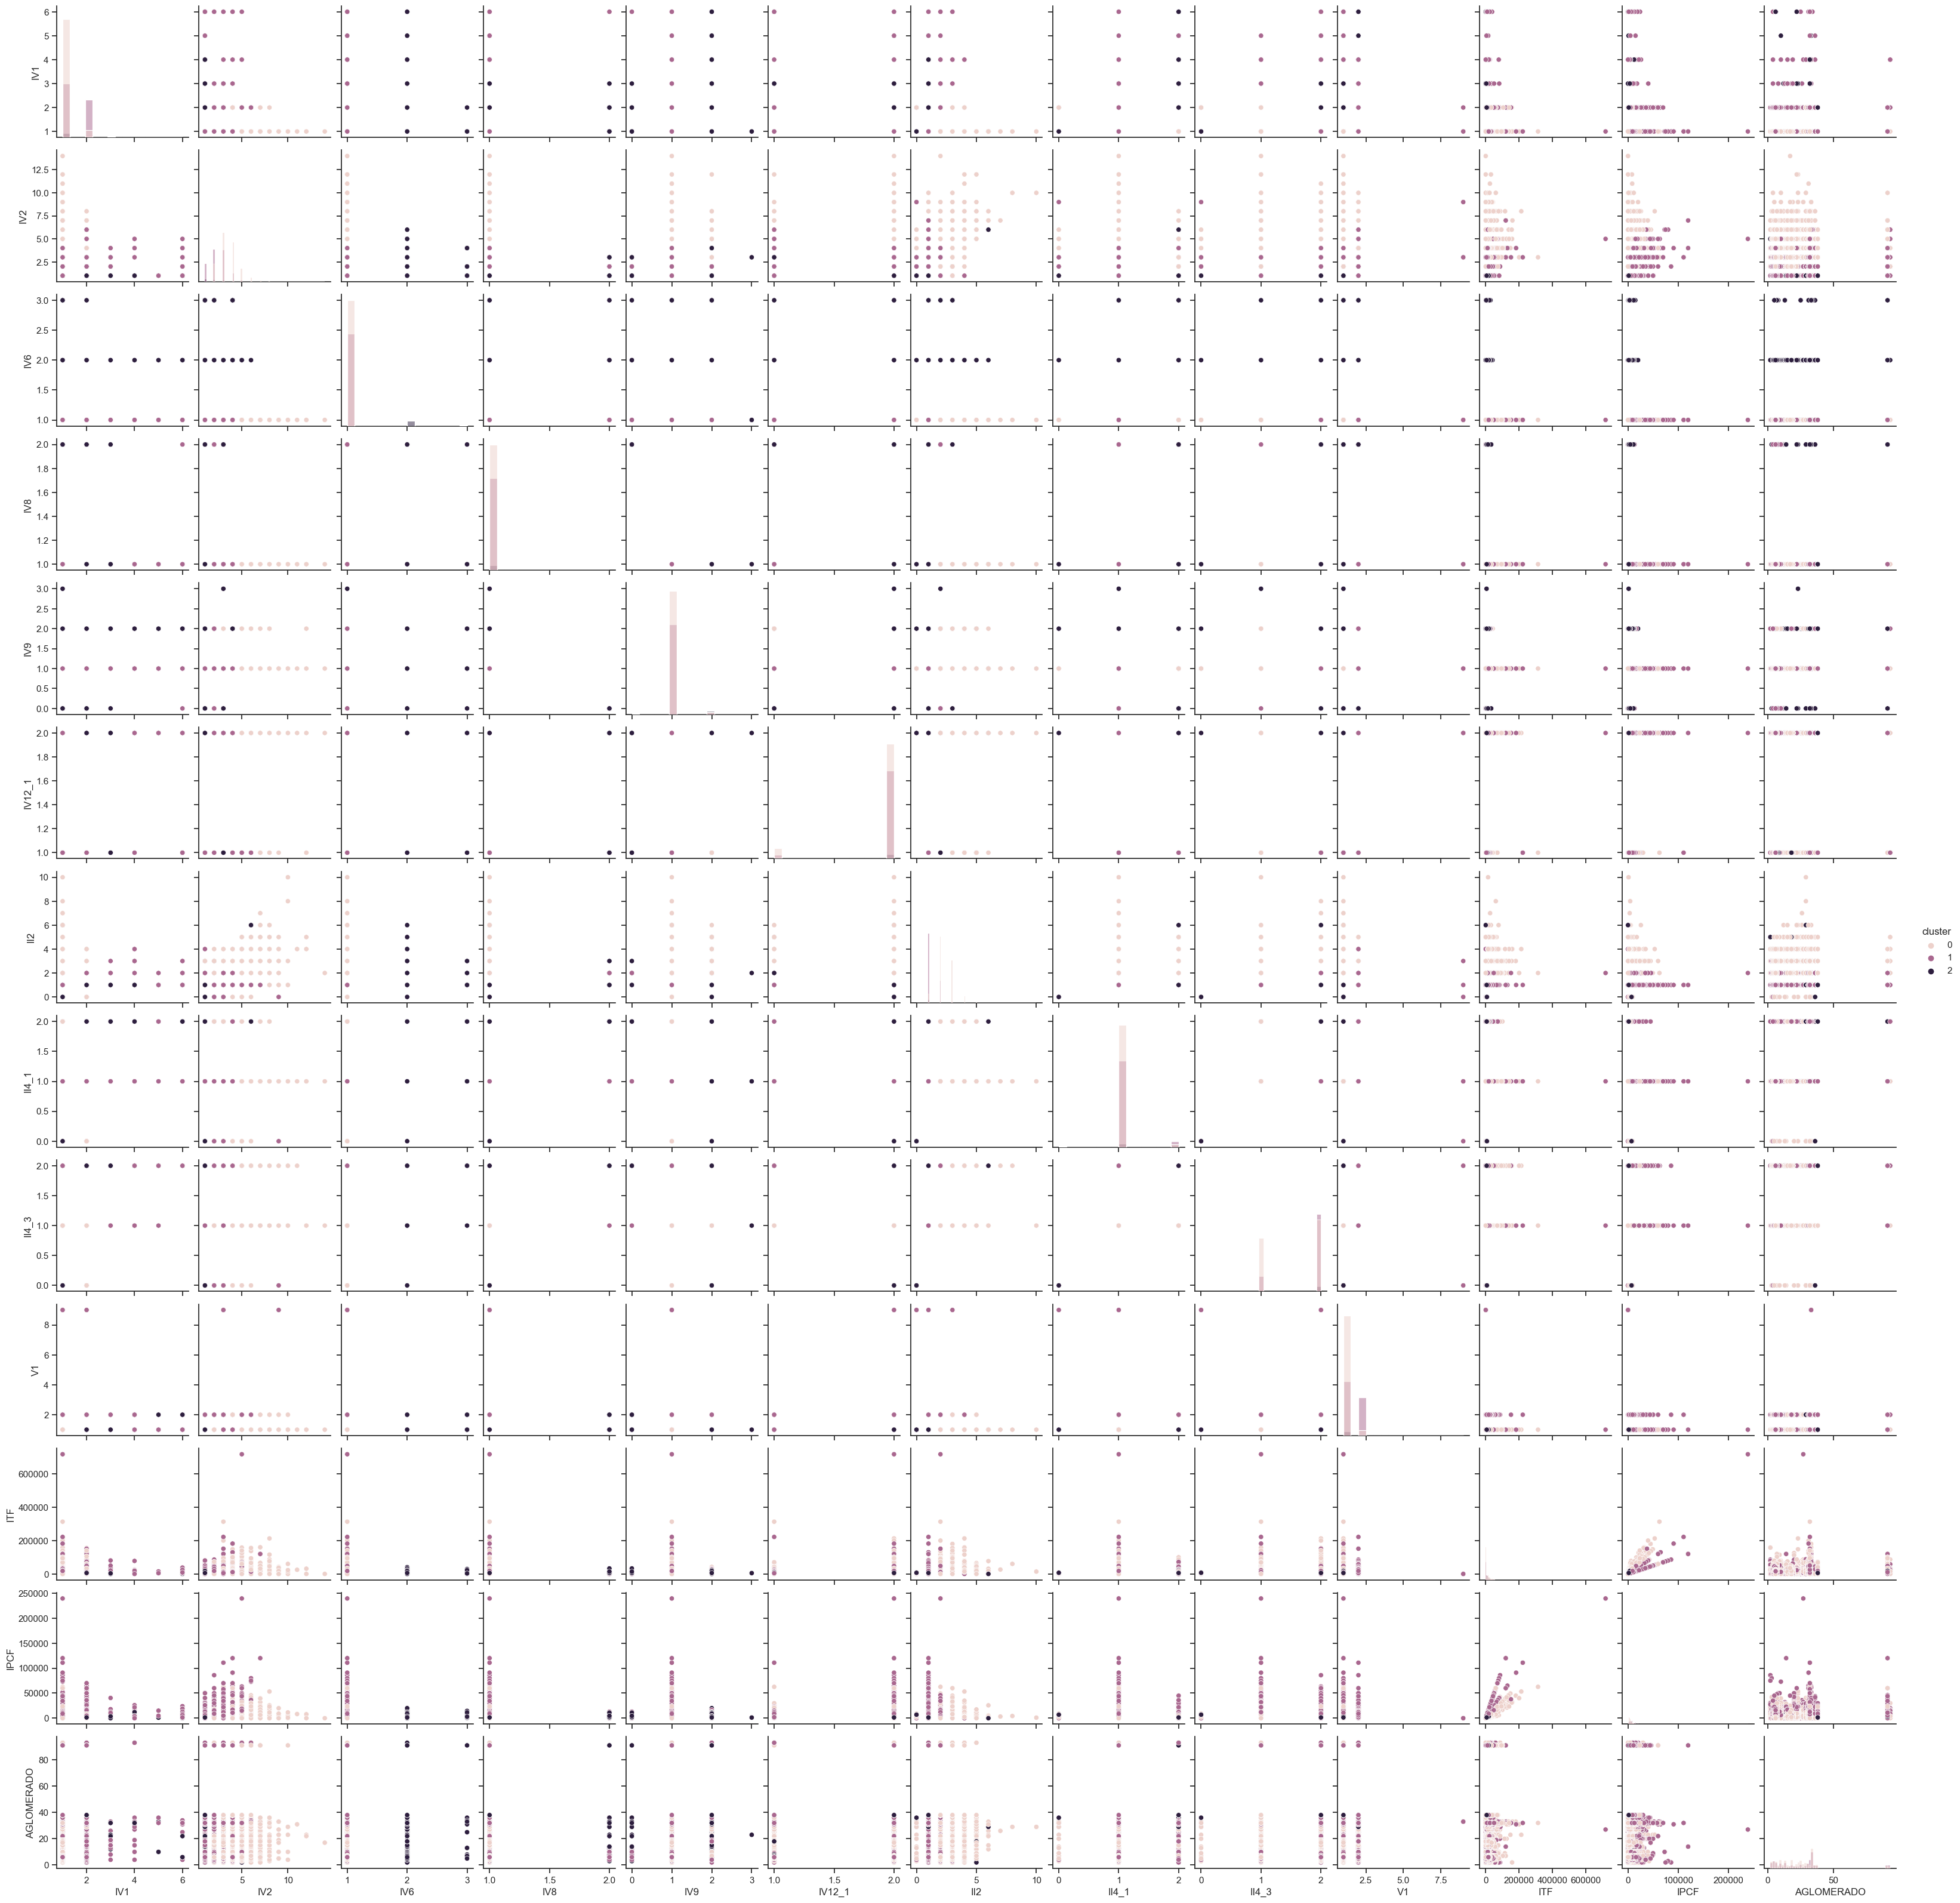

In [19]:
var15_clustered = var15.copy()
var15_clustered['cluster'] = kmeans_clusters
sns.pairplot(var15_clustered, hue='cluster', diag_kind='hist')
plt.show()

K-means Silhouette Score: 0.1491281507745393


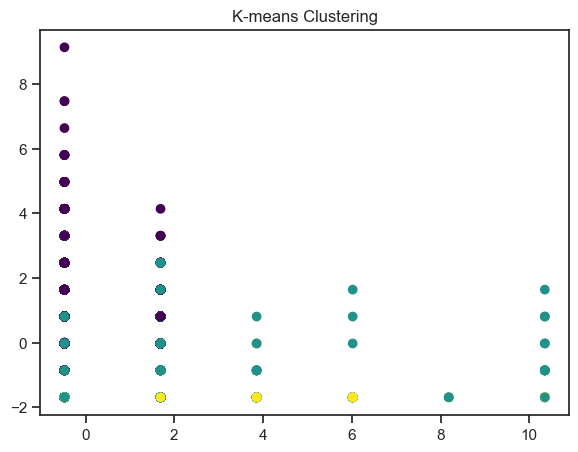

In [18]:
kmeans_silhouette = silhouette_score(data_scaled, kmeans_clusters)
print(f"K-means Silhouette Score: {kmeans_silhouette}")
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans_clusters, cmap='viridis')
plt.title('K-means Clustering')
plt.show()

In [20]:
#Count of classes
var15_clustered['cluster'].value_counts()

0    10569
1     7783
2      444
Name: cluster, dtype: int64

In [22]:
mean_income = var15_clustered.groupby('cluster')['ITF'].mean()
print(mean_income)

cluster
0    14014.640079
1    11218.475267
2     7835.387387
Name: ITF, dtype: float64


In [23]:
var15_clustered['cluster'] = var15_clustered['cluster'].replace({0:3, 1:2, 2:1})
var15_clustered['cluster'].value_counts()

3    10569
2     7783
1      444
Name: cluster, dtype: int64

# Sexual harrassment
There are 12,637 female victims of sexual harassment in 2015 in the ARGENTINA